In [1]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
import cv2
import os
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
data_path = 'ck_new/'

In [3]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    total_train_loss = []
    total_val_loss = []
    total_train_acc = []
    total_val_acc = []
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            loss = criterion(outputs,labels)
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        print(val_correct.double())    
        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))
        total_train_loss.append(train_loss)
        total_val_loss.append(validation_loss)
        total_train_acc.append(train_acc)
        total_val_acc.append(val_acc)
    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")
    return total_train_loss,total_val_loss,total_train_acc,total_val_acc


## create train,vali,test csv file
70%, 10%, 20%

In [4]:
np.random.seed(100)
with open('ck_plus.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]



In [8]:
len(rows)*0.2

65.4

In [10]:
num_each = 9

random_array = np.arange(len(rows))
cnt_an = 0
cnt_di = 0
cnt_fe = 0
cnt_ha = 0
cnt_sa = 0
cnt_su = 0
cnt_ne = 0
loop = True

cnt = 0

st = []
st_lbl = []
idx = []
while loop:
    temp = np.random.choice(random_array)
    item = rows[temp][0]
    lbl = int(rows[temp][1])
    if item not in st:
        
        if lbl == 0 and cnt_an<num_each :
            cnt_an = cnt_an+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==1 and cnt_di<num_each:
            cnt_di = cnt_di+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==2 and cnt_fe<num_each:
            cnt_fe = cnt_fe+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==3 and cnt_ha<num_each:
            cnt_ha = cnt_ha +1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl == 4 and cnt_sa<num_each:
            cnt_sa = cnt_sa +1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==5 and cnt_su<num_each:
            cnt_su = cnt_su+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==6 and cnt_ne<num_each:
            cnt_ne = cnt_ne+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)

#         print(len(st))
        if cnt_an==num_each and cnt_di==num_each and cnt_fe==num_each and cnt_ha==num_each and cnt_sa==num_each and cnt_su==num_each and cnt_ne==num_each:
            break
        

### test.csv

In [15]:
with open('test_ckplus.csv', 'w', encoding='UTF8',newline='') as test_ckplus:
    test_writer = csv.writer(test_ckplus)
    for i in range(len(rows)):
        if i in idx:
            test_writer.writerow(rows[i])

### vali.csv

In [ ]:
num_val = 32
idx_val = []
cnt_val = 0
t=0
while True:
    t = t+1
    temp = np.random.choice(random_array)
    if temp not in idx:
        if cnt_val>=num_val:
            break
        cnt_val = cnt_val+1
        idx_val.append(temp)
#     print(t,cnt_val)

In [27]:
with open('vali_ckplus.csv', 'w', encoding='UTF8',newline='') as vali_ckplus:
    vali_writer = csv.writer(vali_ckplus)
    for i in range(len(rows)):
        if i in idx_val:
            vali_writer.writerow(rows[i])

### train.csv

In [29]:
with open('train_ckplus.csv', 'w', encoding='UTF8',newline='') as train_ckplus:
    train_writer = csv.writer(train_ckplus)
    for i in range(len(rows)):
        if i not in idx and i not in idx_val:
            train_writer.writerow(rows[i])

## create dataset and dataloader

In [4]:
class Jaffe_Dataset(Dataset):
    def __init__(self,csv_file,img_dir,datatype,transform):
        with open(csv_file,'r') as csvfile:
            rd = csv.reader(csvfile)
            self.data = [row for row in rd]

        self.img_dir = img_dir
        self.transform = transform
        self.datatype = datatype

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
#         img = Image.open(self.img_dir+self.data[idx][0])

        img = cv2.imread(self.img_dir+self.data[idx][0],0)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         print(img.shape)
        lables = np.array(int(self.data[idx][1]))
        lables = torch.from_numpy(lables).long()

        if self.transform :
            img = self.transform(img)
        return img,lables


In [5]:
# traincsv_file = 'train_ckplus.csv'
traincsv_file = 'train_val_ckplus.csv'
validationcsv_file = 'vali_ckplus.csv'
train_img_dir = 'ck_new/'
validation_img_dir = 'ck_new/'

# runtime

In [6]:
batchsize = 128
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
# transformation= transforms.Compose([transforms.ToTensor()])
train_dataset= Jaffe_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Jaffe_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [7]:
epochs = 55
lr = 0.005

net = Deep_Emotion()
net.to(device)
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= lr)

In [8]:
train_loss, val_loss,train_acc,val_acc = Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================


D:\Anacon_Install\lib\site-packages\torch\nn\functional.py:4277: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
D:\Anacon_Install\lib\site-packages\torch\nn\functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


tensor(5., dtype=torch.float64)
Epoch: 1 	Training Loss: 0.01931693 	Validation Loss 0.06048234 	Training Acuuarcy 25.000% 	Validation Acuuarcy 15.625%
tensor(11., dtype=torch.float64)
Epoch: 2 	Training Loss: 0.01827772 	Validation Loss 0.05916151 	Training Acuuarcy 32.576% 	Validation Acuuarcy 34.375%
tensor(14., dtype=torch.float64)
Epoch: 3 	Training Loss: 0.01805093 	Validation Loss 0.05855805 	Training Acuuarcy 42.803% 	Validation Acuuarcy 43.750%
tensor(18., dtype=torch.float64)
Epoch: 4 	Training Loss: 0.01368598 	Validation Loss 0.05542560 	Training Acuuarcy 55.303% 	Validation Acuuarcy 56.250%
tensor(18., dtype=torch.float64)
Epoch: 5 	Training Loss: 0.01132044 	Validation Loss 0.05050586 	Training Acuuarcy 57.955% 	Validation Acuuarcy 56.250%
tensor(18., dtype=torch.float64)
Epoch: 6 	Training Loss: 0.01328044 	Validation Loss 0.04660458 	Training Acuuarcy 62.121% 	Validation Acuuarcy 56.250%
tensor(16., dtype=torch.float64)
Epoch: 7 	Training Loss: 0.01059419 	Validation Lo

tensor(28., dtype=torch.float64)
Epoch: 55 	Training Loss: 0.00161149 	Validation Loss 0.01045159 	Training Acuuarcy 96.591% 	Validation Acuuarcy 87.500%
===================================Training Finished===================================


### plot

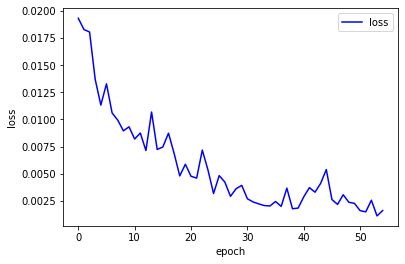

In [9]:
import matplotlib.pyplot as plt
# plt.switch_backend('Agg') # 后端设置'Agg' 参考：https://cloud.tencent.com/developer/article/1559466

plt.figure()                   # 设置图片信息 例如：plt.figure(num = 2,figsize=(640,480))
plt.plot(train_loss,'b',label = 'loss')        # epoch_losses 传入模型训练中的 loss[]列表,在训练过程中，先创建loss列表，将每一个epoch的loss 加进这个列表
# plt.plot(val_loss,'g',label = 'loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()        #个性化图例（颜色、形状等）

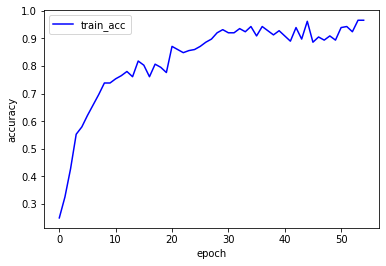

In [10]:
plt.figure()                   # 设置图片信息 例如：plt.figure(num = 2,figsize=(640,480))
plt.plot(train_acc,'b',label = 'train_acc')        # epoch_losses 传入模型训练中的 loss[]列表,在训练过程中，先创建loss列表，将每一个epoch的loss 加进这个列表
# plt.plot(val_acc,'g',label = 'val_acc') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()        #个性化图例（颜色、形状等）

### test performance

In [11]:
testcsv_file = 'test_ckplus.csv'
test_img_dir = 'ck_new/'
test_dataset= Jaffe_Dataset(csv_file=testcsv_file, img_dir = test_img_dir, datatype = 'test', transform = transformation)
test_loader= DataLoader(test_dataset,batch_size=63,shuffle = True,num_workers=0)

total = []
net.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = net(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        wrong = torch.where(result != labels,torch.tensor([1.]),torch.tensor([0.])) 
        acc = 1-(torch.sum(wrong)/70)
        total.append(acc.item())

    print('Accuracy of the network on the test images: %d %%' % (100 * np.mean(total)))

Accuracy of the network on the test images: 65 %


### confusion matrix

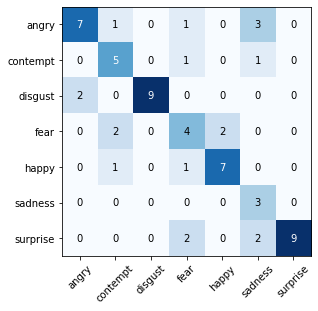

In [12]:
def confusion_matrix(preds, labels, conf_matrix):
#     preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1
    return conf_matrix

Emotion_kinds = 7
conf_matrix = torch.zeros(Emotion_kinds, Emotion_kinds)


            
net.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = net(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        conf_matrix = confusion_matrix(result, labels, conf_matrix)

Emotion=7#这个数值是具体的分类数，大家可以自行修改
labels = ['angry', 'contempt', 'disgust', 'fear', 'happy','sadness','surprise']#每种类别的标签
# 0=anger, 1=contempt, 2=disgust, 3=fear, 4=happy, 5=sadness, 6=surprise
# 显示数据
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# 在图中标注数量/概率信息
thresh = conf_matrix.max() / 2	#数值颜色阈值，如果数值超过这个，就颜色加深。
for x in range(Emotion_kinds):
    for y in range(Emotion_kinds):
        # 注意这里的matrix[y, x]不是matrix[x, y]
        info = int(conf_matrix[y, x])
        plt.text(x, y, info,
                 verticalalignment='center',
                 horizontalalignment='center',
                 color="white" if info > thresh else "black")
                 
plt.tight_layout()#保证图不重叠
plt.yticks(range(Emotion_kinds), labels)
plt.xticks(range(Emotion_kinds), labels,rotation=45)#X轴字体倾斜45°
plt.show()
plt.close()
